In [1]:
# ============================================= #
#           Setting Up Our Environment
# ============================================= #

import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_datareader as pdr
import pandas_datareader.data as web
import pandas_datareader.wb as wb

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import linear_reset
from statsmodels.graphics.gofplots import ProbPlot
import scipy.stats as stats


# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.precision', 3)

# Set the default figure size for plots
plt.rcParams['figure.figsize'] = [12, 6]

plt.style.use('seaborn-v0_8')

%reload_ext watermark

print("*"*52)
%watermark -a "Dr. Saad Laouadi"
%watermark -ud

print("-"*52)
print("The loaded packages".center(52))
print("-"*52)

%watermark -iv

print("*"*52)

****************************************************
Author: Dr. Saad Laouadi

Last updated: 2025-03-01

----------------------------------------------------
                The loaded packages                 
----------------------------------------------------
numpy            : 1.26.4
matplotlib       : 3.10.0
pandas_datareader: 0.10.0
statsmodels      : 0.14.4
pandas           : 1.5.3
scipy            : 1.15.1
seaborn          : 0.13.2

****************************************************


# Multiple Linear Regression: Sales, Price, and Advertising

This notebook demonstrates a basic multiple linear regression analysis on the relationship between sales, price, and advertising expenditure.

In [5]:
##  Load Data

data = pd.read_csv("../datasets/poe5csv/andy.csv")


# Display the first few rows
print("Sample data:")
print(data.head())

Sample data:
   sales  price  advert
0   73.2   5.69     1.3
1   71.8   6.49     2.9
2   62.4   5.63     0.8
3   67.4   6.22     0.7
4   89.3   5.02     1.5


## 2. Model Estimation

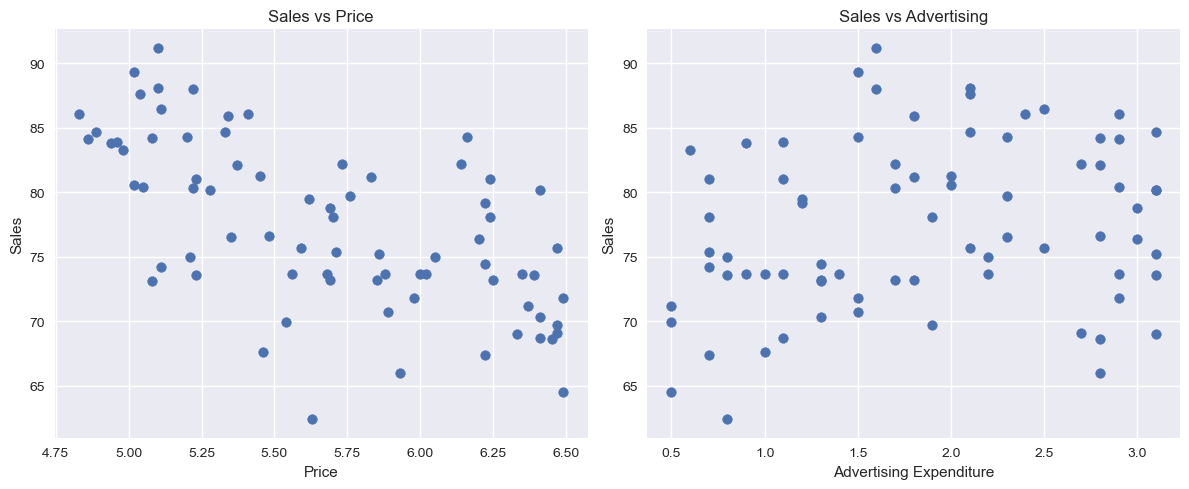

In [9]:
# Create scatter plots to visualize relationships
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(data['price'], data['sales'])
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Sales')
axes[0].set_title('Sales vs Price')
axes[0].grid(True)

axes[1].scatter(data['advert'], data['sales'])
axes[1].set_xlabel('Advertising Expenditure')
axes[1].set_ylabel('Sales')
axes[1].set_title('Sales vs Advertising')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Estimate the model: 

$$\text{SALES} = \beta_1 + \beta_2 \text{PRICE} + \beta_3 \text{ADVERT}$$

In [12]:
# Add constant term
X = sm.add_constant(data[['price', 'advert']])
y = data['sales']

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Display regression results
print("\nRegression Results:")
print(results.summary())


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     29.25
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           5.04e-10
Time:                        22:05:49   Log-Likelihood:                -223.87
No. Observations:                  75   AIC:                             453.7
Df Residuals:                      72   BIC:                             460.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.9136      6.35

In [13]:
# Extract key statistics
coefficients = results.params
std_errors = results.bse
t_values = results.tvalues
p_values = results.pvalues
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj
f_stat = results.fvalue
f_pvalue = results.f_pvalue

print("\nRegression Equation:")
print(f"SALES = {coefficients[0]:.2f} {coefficients[1]:+.2f}*PRICE {coefficients[2]:+.2f}*ADVERT")


Regression Equation:
SALES = 118.91 -7.91*PRICE +1.86*ADVERT


## 3. Model Diagnostics: Checking Assumptions

### 3.1 Residual Analysis

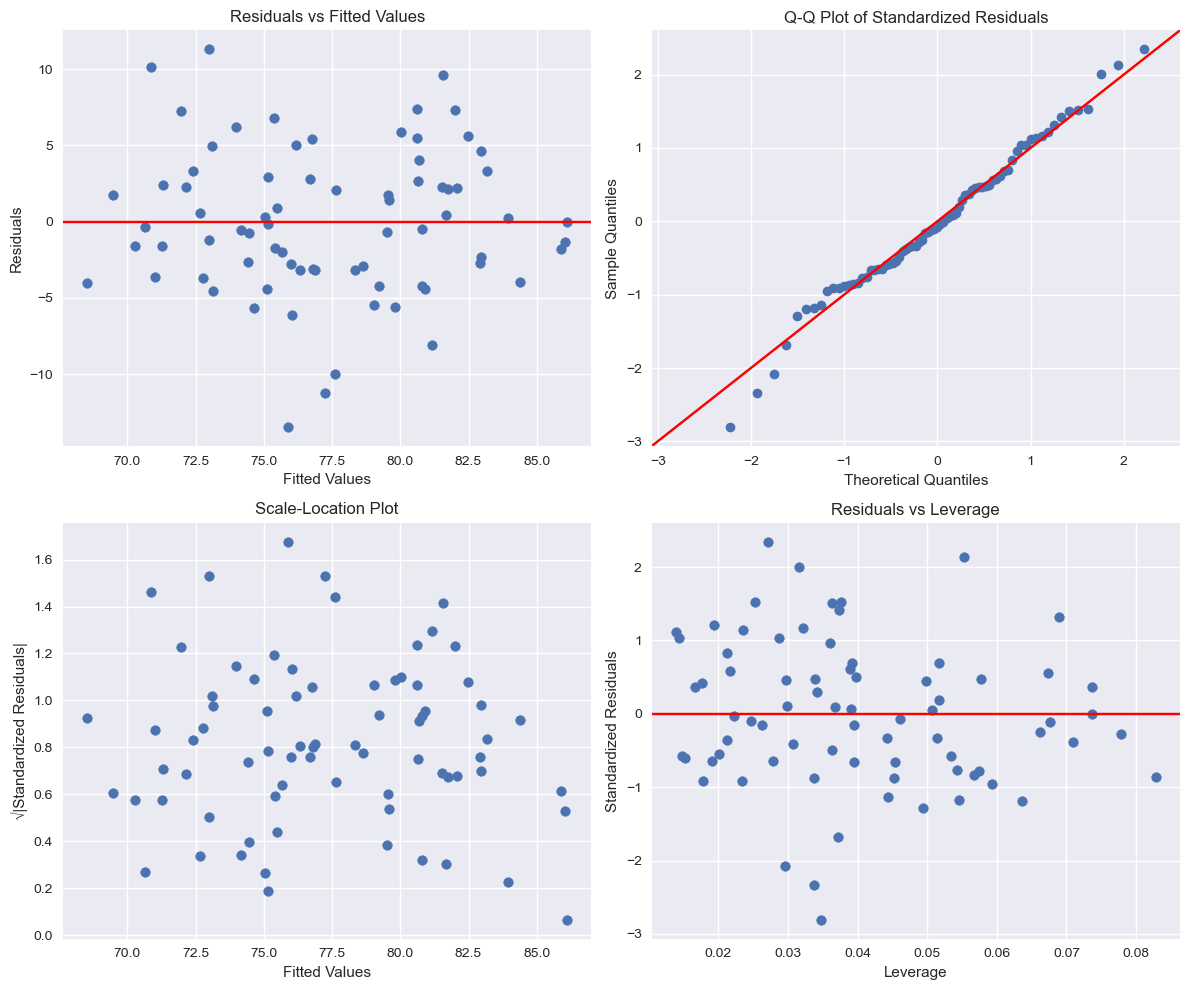

In [14]:
# Extract residuals and fitted values
residuals = results.resid
fitted_values = results.fittedvalues
standardized_residuals = results.get_influence().resid_studentized_internal

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(fitted_values, residuals)
axes[0, 0].axhline(y=0, color='r', linestyle='-')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted Values')
axes[0, 0].grid(True)

# 2. Q-Q Plot
QQ = ProbPlot(standardized_residuals)
QQ.qqplot(line='45', ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot of Standardized Residuals')

# 3. Scale-Location Plot
axes[1, 0].scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)))
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True)

# 4. Residuals vs Leverage
leverage = results.get_influence().hat_matrix_diag
axes[1, 1].scatter(leverage, standardized_residuals)
axes[1, 1].axhline(y=0, color='r', linestyle='-')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Standardized Residuals')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

### 3.2 Normality of Residuals

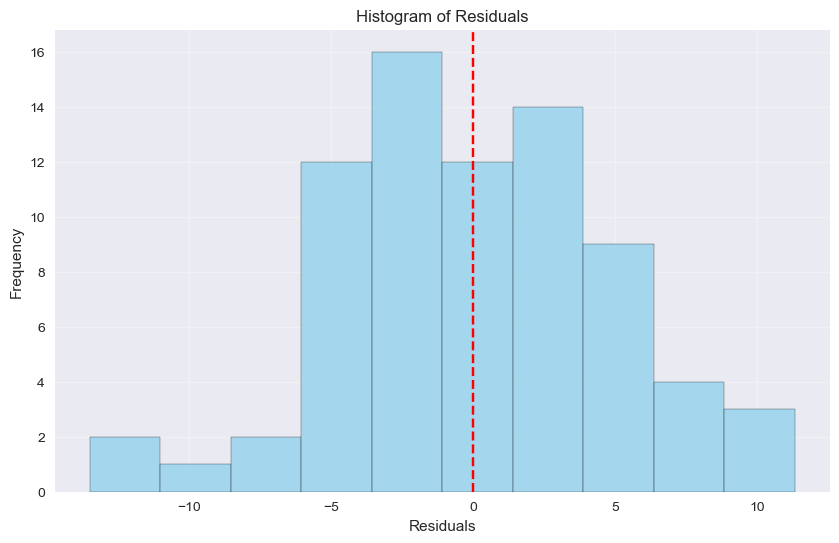


Shapiro-Wilk Test for Normality:
W = 0.9880, p-value = 0.7028
Null hypothesis: Residuals are normally distributed
Fail to reject the null hypothesis at 5% significance level.


In [15]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print(f"W = {shapiro_test[0]:.4f}, p-value = {shapiro_test[1]:.4f}")
print(f"Null hypothesis: Residuals are normally distributed")
print(f"{'Reject' if shapiro_test[1] < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level.")

### 3.3 Heteroskedasticity

In [16]:
# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)
print("\nBreusch-Pagan Test for Heteroskedasticity:")
bp_labels = ['LM statistic', 'p-value', 'f-value', 'f p-value']
print('\n'.join([f"{label} = {value:.4f}" for label, value in zip(bp_labels, bp_test)]))
print(f"Null hypothesis: Homoskedasticity (constant error variance)")
print(f"{'Reject' if bp_test[1] < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level.")


Breusch-Pagan Test for Heteroskedasticity:
LM statistic = 2.5722
p-value = 0.2763
f-value = 1.2785
f p-value = 0.2847
Null hypothesis: Homoskedasticity (constant error variance)
Fail to reject the null hypothesis at 5% significance level.


In [17]:
# White test
try:
    white_test = het_white(residuals, X)
    print("\nWhite Test for Heteroskedasticity:")
    white_labels = ['LM statistic', 'p-value', 'f-value', 'f p-value']
    print('\n'.join([f"{label} = {value:.4f}" for label, value in zip(white_labels, white_test)]))
    print(f"Null hypothesis: Homoskedasticity (constant error variance)")
    print(f"{'Reject' if white_test[1] < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level.")
except:
    print("\nWhite Test: Could not be computed with the current data.")


White Test for Heteroskedasticity:
LM statistic = 4.5374
p-value = 0.4749
f-value = 0.8886
f p-value = 0.4936
Null hypothesis: Homoskedasticity (constant error variance)
Fail to reject the null hypothesis at 5% significance level.


### 3.4 Multicollinearity

In [18]:
# Calculate Variance Inflation Factors (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)
print("VIF > 10 indicates problematic multicollinearity")


Variance Inflation Factors (VIF):
  Variable      VIF
0    const  126.737
1    price    1.001
2   advert    1.001
VIF > 10 indicates problematic multicollinearity


### 3.5 Model Specification

In [19]:
# Ramsey RESET Test
try:
    reset_test = linear_reset(results, power=2)
    print("\nRamsey RESET Test for Model Specification:")
    print(f"F-statistic = {reset_test[0]:.4f}, p-value = {reset_test[1]:.4f}")
    print(f"Null hypothesis: Model is correctly specified")
    print(f"{'Reject' if reset_test[1] < 0.05 else 'Fail to reject'} the null hypothesis at 5% significance level.")
except:
    print("\nRamsey RESET Test: Could not be computed with the current data.")


Ramsey RESET Test for Model Specification:

Ramsey RESET Test: Could not be computed with the current data.


### 3.6 Autocorrelation

In [20]:
# Durbin-Watson test
dw_stat = durbin_watson(residuals)
print("\nDurbin-Watson Test for Autocorrelation:")
print(f"DW statistic = {dw_stat:.4f}")
print(f"DW statistic ranges from 0 to 4, with 2 indicating no autocorrelation.")
print(f"Values toward 0 suggest positive autocorrelation, values toward 4 suggest negative autocorrelation.")


Durbin-Watson Test for Autocorrelation:
DW statistic = 2.1830
DW statistic ranges from 0 to 4, with 2 indicating no autocorrelation.
Values toward 0 suggest positive autocorrelation, values toward 4 suggest negative autocorrelation.


## 4. Summary of Model Diagnostics

In [21]:
print("\n=== Summary of Model Diagnostics ===")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")
print(f"F-statistic: {f_stat:.4f}, p-value: {f_pvalue:.4f}")

print("\nAssumption Checks:")
print(f"1. Normality of Residuals: {'Violated' if shapiro_test[1] < 0.05 else 'Satisfied'}")
print(f"2. Homoskedasticity: {'Violated' if bp_test[1] < 0.05 else 'Satisfied'}")
print(f"3. No Multicollinearity: {'Violated' if vif_data['VIF'].max() > 10 else 'Satisfied'}")
try:
    print(f"4. Correct Specification: {'Violated' if reset_test[1] < 0.05 else 'Satisfied'}")
except:
    print("4. Correct Specification: Could not be determined")
print(f"5. No Autocorrelation: {'Satisfied' if 1.5 < dw_stat < 2.5 else 'Potentially violated'}")


=== Summary of Model Diagnostics ===
R-squared: 0.4483
Adjusted R-squared: 0.4329
F-statistic: 29.2479, p-value: 0.0000

Assumption Checks:
1. Normality of Residuals: Satisfied
2. Homoskedasticity: Satisfied
3. No Multicollinearity: Violated
4. Correct Specification: Could not be determined
5. No Autocorrelation: Satisfied
